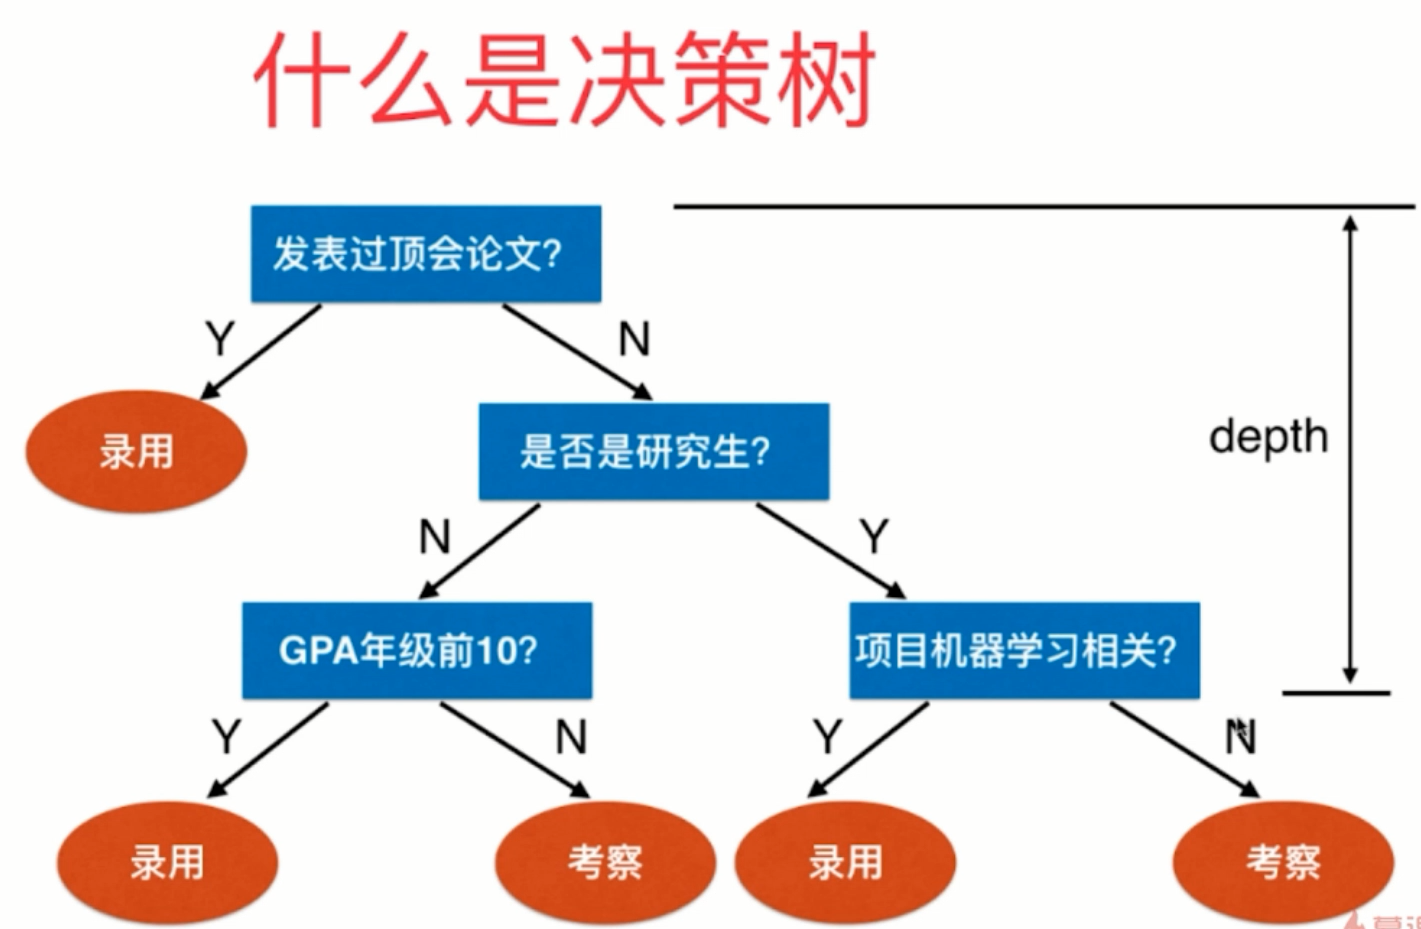

In [1]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = datasets.load_iris()
X = iris.data[: , 2:]
y = iris.target

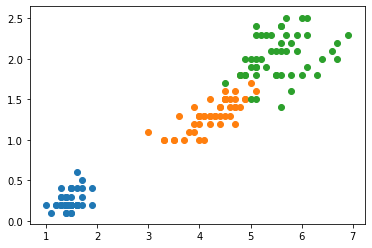

In [4]:
plt.scatter(X[y==0 , 0] , X[y==0 , 1])
plt.scatter(X[y==1 , 0] , X[y==1 , 1])
plt.scatter(X[y==2 , 0] , X[y==2 , 1])
plt.show()

In [5]:
dt_clf = DecisionTreeClassifier(max_depth=2 , criterion = "entropy")
dt_clf.fit(X , y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


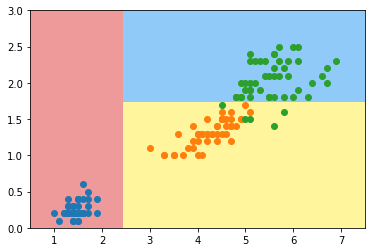

In [6]:
plot_decision_boundary(dt_clf , [0.5,7.5,0,3])
plt.scatter(X[y==0 , 0] , X[y==0 , 1])
plt.scatter(X[y==1 , 0] , X[y==1 , 1])
plt.scatter(X[y==2 , 0] , X[y==2 , 1])
plt.show()

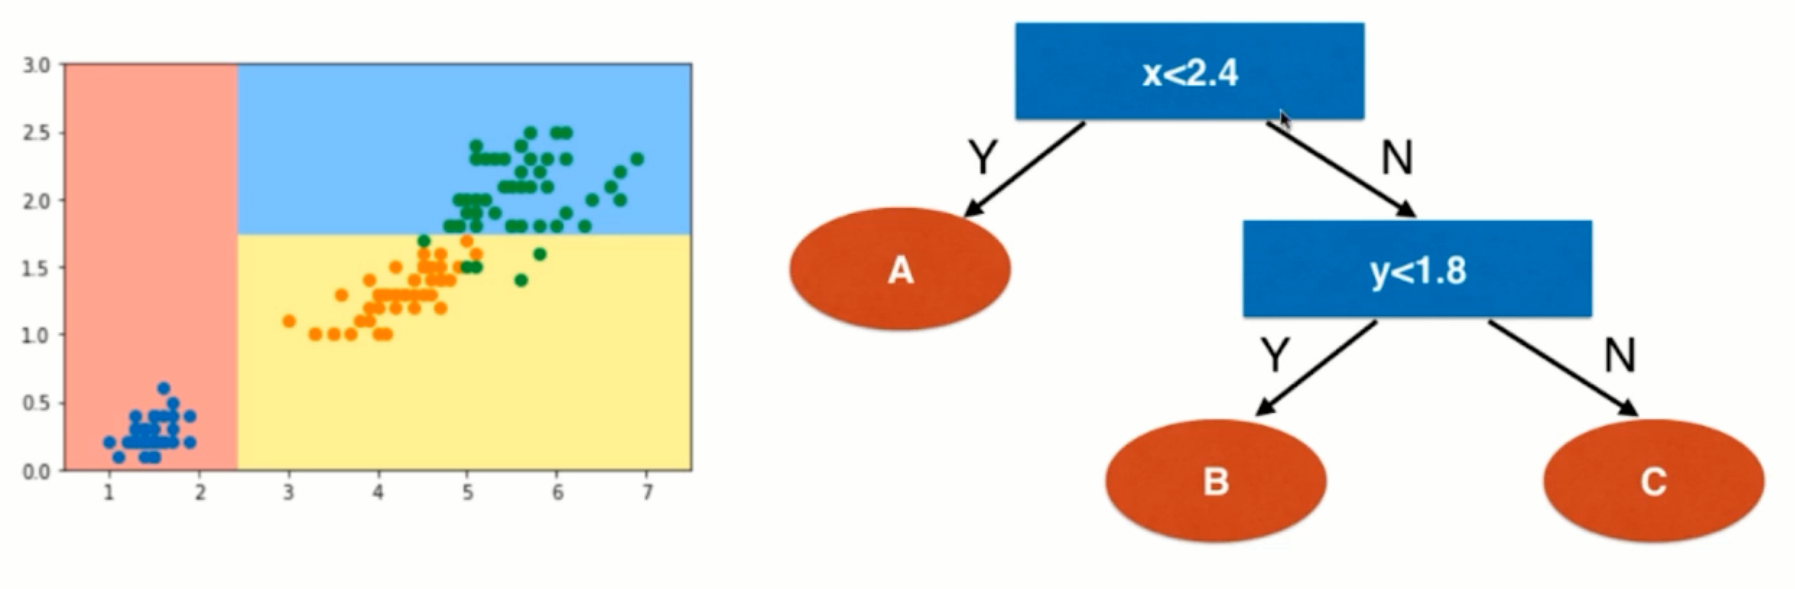

## 信息熵

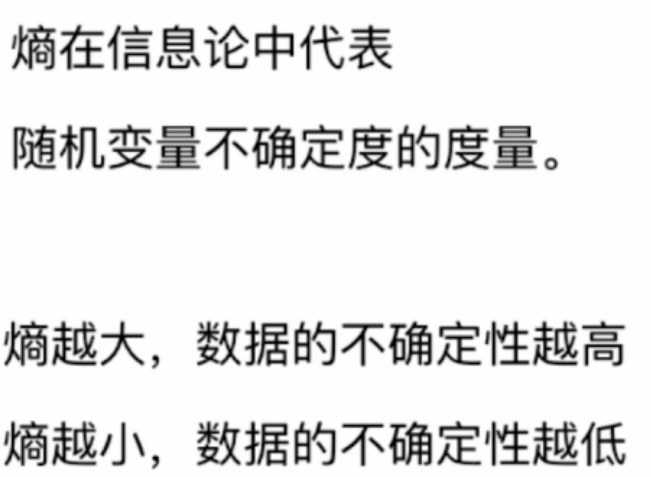

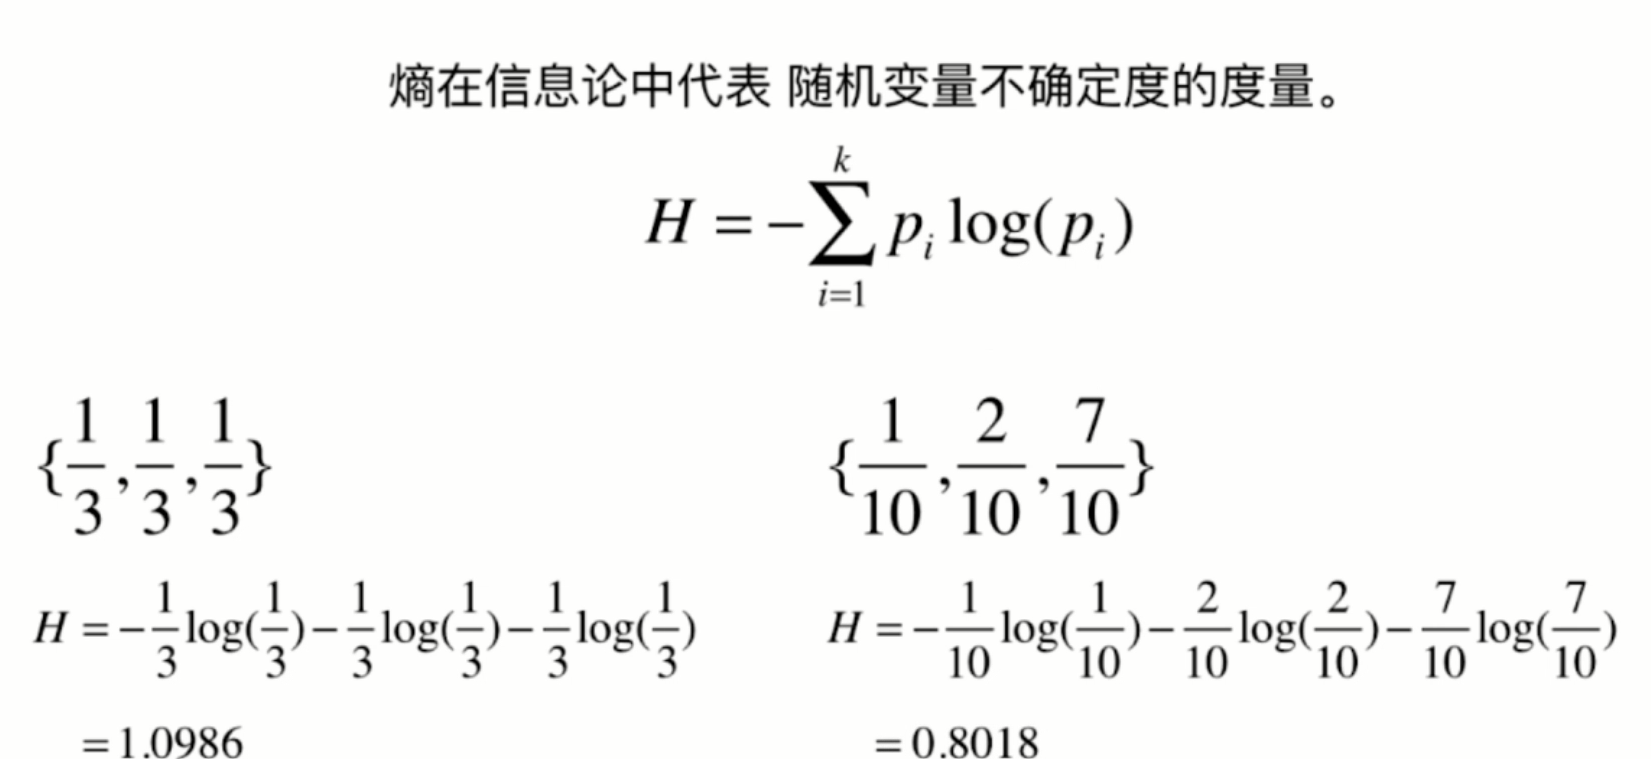

二分类的信息熵

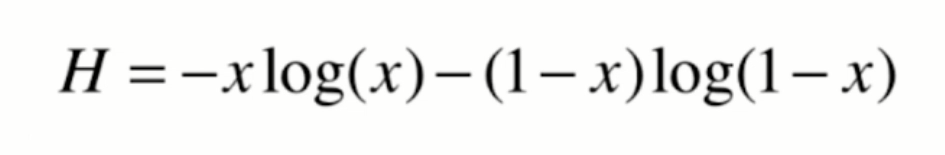

In [7]:
def entropy(p):
    return -p  * np.log(p) - (1-p) * np.log(1-p)

In [8]:
 x  = np.linspace(0.01 , 0.99 , 200)

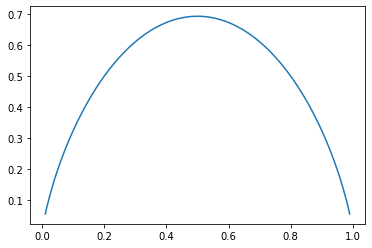

In [9]:
plt.plot(x  ,  entropy(x))
plt.show()

## 使用信息熵最优划分

使得信息熵最小

In [10]:
def spilt(X , y , d , v):
    index_a = (X[: , d] <= v )
    index_b = (X[: , d] > v )
    return X[index_a] , X[index_b] , y[index_a] , y[index_b]

In [13]:
from collections import Counter
def entropy(y):
    counter = Counter(y)
    res = 0
    for num in counter.values():
        p = num / len(y)
        res += -p * np.log(p)
    return res
    
def try_spilt(X , y):
    depth,value = 0, 0
    best_entropy = float('inf')
    for d in range(X.shape[1]):
        sort_index = np.argsort(X[:,d])
        for i in range(1 , len(X)):
            if X[sort_index[i-1] , d] !=  X[sort_index[i],d]:
                v = (X[sort_index[i-1] , d] +  X[sort_index[i],d]) /2
                x_l , x_r , y_l , y_r = spilt(X , y , d , v)
                e = entropy(y_l)  +  entropy(y_r)
                if e < best_entropy:
                    depth,value = d , v
                    best_entropy = e
    return depth , value , best_entropy

In [14]:
try_spilt(X , y)

(0, 2.45, 0.6931471805599453)

对比上图可知，在第零个维度的2.45左右，进行了第一次划分

## 基尼系数

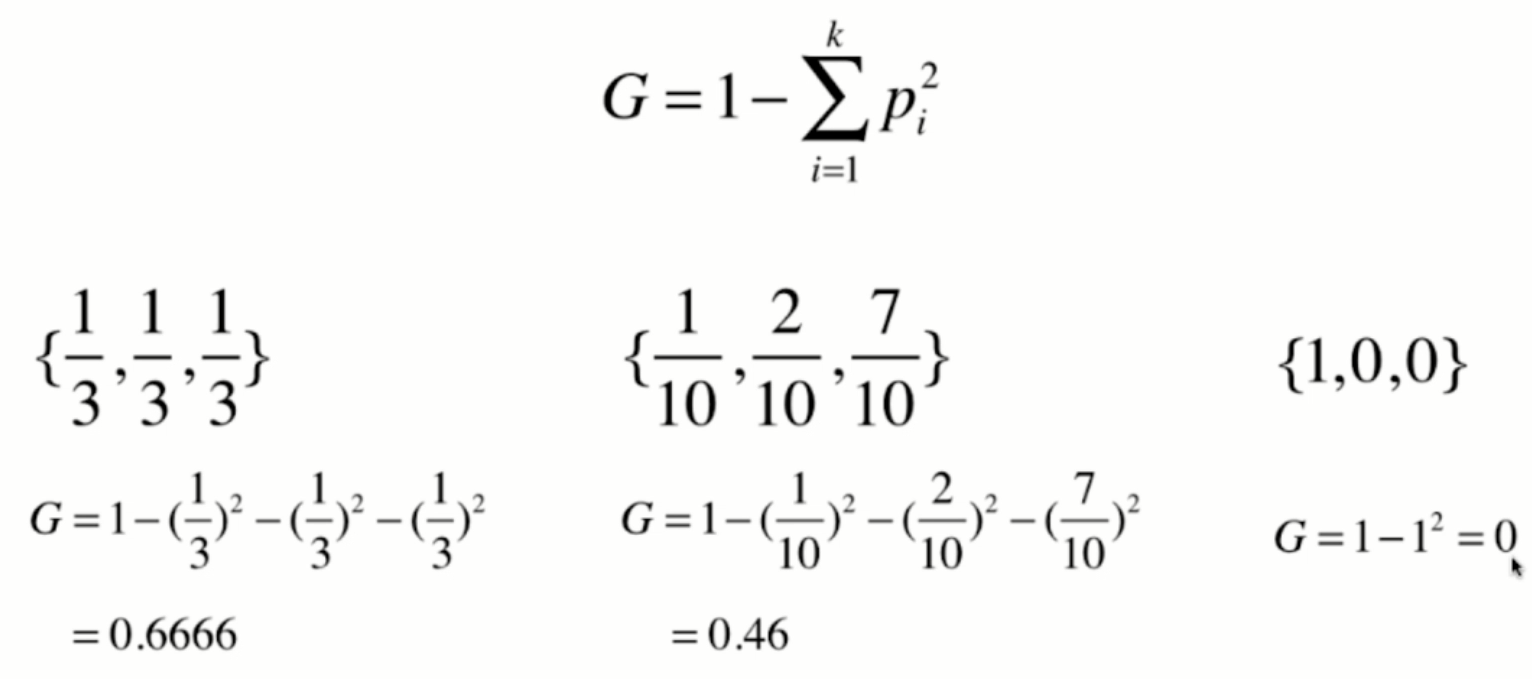

使用基尼系数

In [16]:
dt_clf_gini = DecisionTreeClassifier(max_depth=2 , criterion = "gini")
dt_clf_gini.fit(X , y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


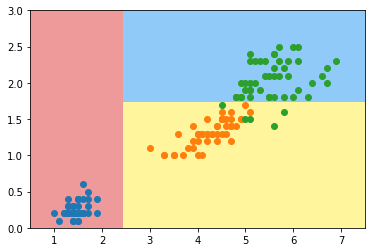

In [17]:
plot_decision_boundary(dt_clf_gini , [0.5,7.5,0,3])
plt.scatter(X[y==0 , 0] , X[y==0 , 1])
plt.scatter(X[y==1 , 0] , X[y==1 , 1])
plt.scatter(X[y==2 , 0] , X[y==2 , 1])
plt.show()

与信息熵效果不会差太多

但是运行速度比信息熵稍快

## CART

Classification And Regression Tree

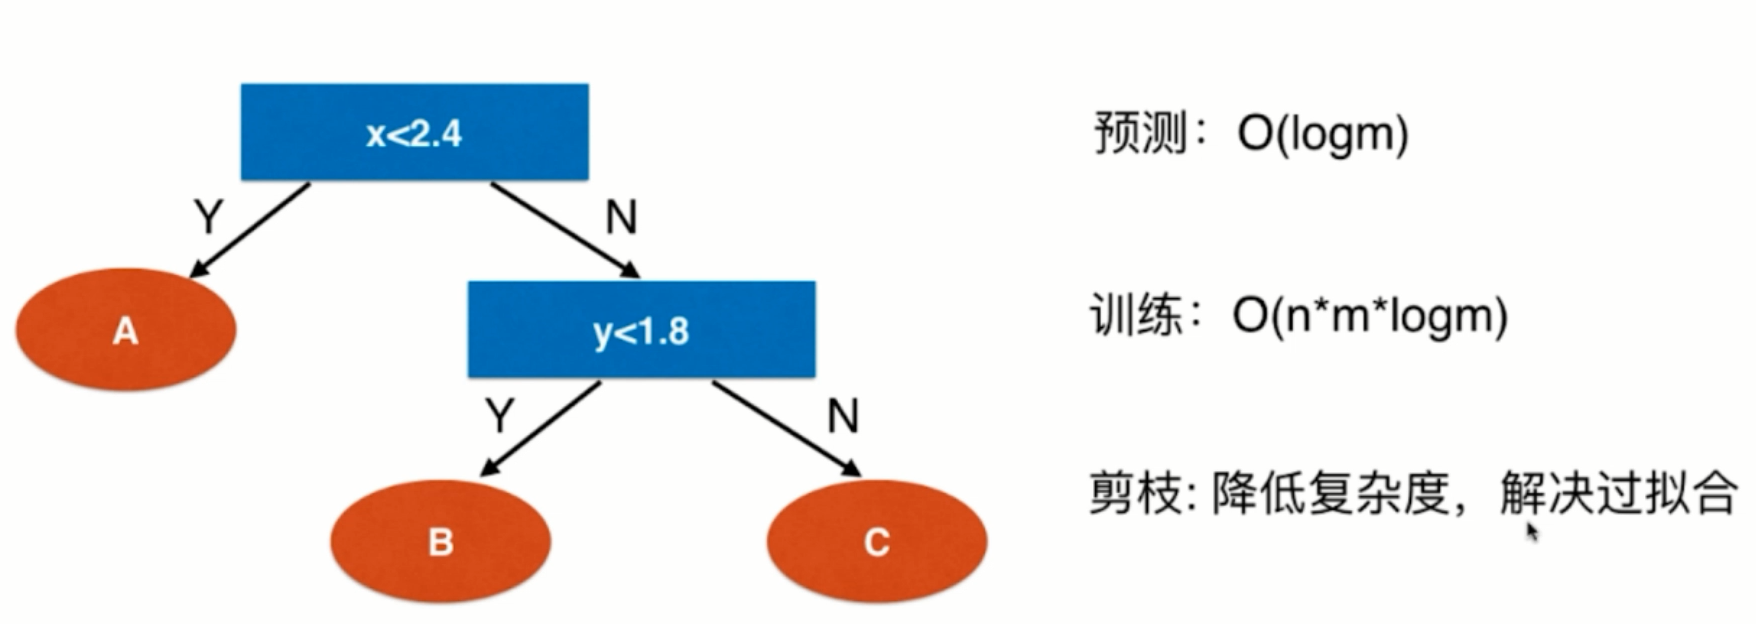

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

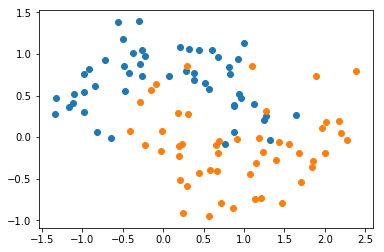

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

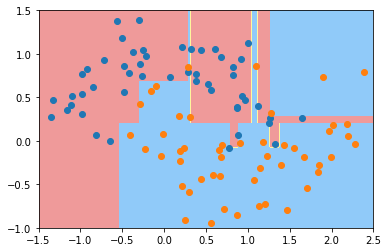

In [6]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

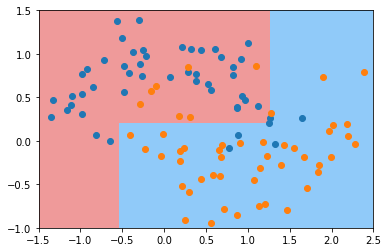

In [7]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

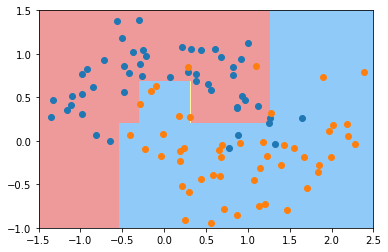

In [8]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

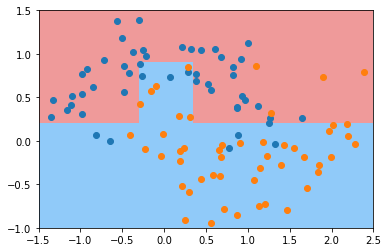

In [9]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

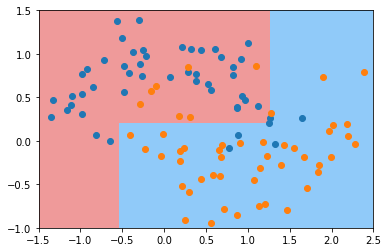

In [10]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 解决回归问题

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [23]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [27]:
X_train , X_test , y_train , y_test  =  train_test_split(X , y)

In [28]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
dt_reg.score(X_train , y_train)

1.0

In [30]:
dt_reg.score(X_test , y_test)

0.86559969252355

In [33]:
param_grid = [
    {
        'max_leaf_nodes' :  [i for i in range(1,11)],
        'max_depth' : [i for i in range(1,11)],
        'min_samples_leaf' :  [i for i in range(1,11)]
    }
]

In [34]:
from sklearn.model_selection import GridSearchCV
grid_search  =  GridSearchCV(dt_reg ,  param_grid , n_jobs=-1, verbose=2)  #实例化网格搜索对象

In [35]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 4981 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    4.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     

In [36]:
grid_search.score(X_train , y_train)

0.8527653798425231

In [37]:
grid_search.score(X_test , y_test)

0.9014313625348608

In [38]:
grid_search.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}

## 局限性

决策边界都是平行于坐标轴